In [13]:
import os, sys

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

print("PROJECT_ROOT:", PROJECT_ROOT)

%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.data_loading_cross import load_sp500_adj_close
from src.signals_cross import (
    make_cross_sectional_signals,
    build_cross_sectional_matrix,
    CROSS_FEATURES,
)




PROJECT_ROOT: c:\Users\gehra\Documents\GitHub\Quant_coding
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Load SP500 panel, as long as we can reasonably go
prices = load_sp500_adj_close(start="2000-01-01")
prices = load_sp500_adj_close(start="2000-01-01", force_download=True)

prices.info()
prices.head()
print("Price panel shape:", prices.shape)
print("Date range:", prices.index.min(), "->", prices.index.max())
print("Number of tickers:", len(prices.columns))


Universe size from CSV: 503
  -> Batch close shape: (6527, 50)
  -> Batch close shape: (6527, 50)
  -> Batch close shape: (6527, 50)
  -> Batch close shape: (6527, 50)
  -> Batch close shape: (6527, 50)
  -> Batch close shape: (6527, 50)
  -> Batch close shape: (6527, 50)
  -> Batch close shape: (6527, 50)
  -> Batch close shape: (6527, 50)
  -> Batch close shape: (6527, 50)
  -> Batch close shape: (6527, 3)
Final price panel shape: (6527, 503)
Saved S&P 500 adj close to C:\Users\gehra\Documents\GitHub\Quant_coding\data\sp500_adj_close.parquet
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6527 entries, 2000-01-03 to 2025-12-12
Columns: 503 entries, NVDA to NWS
dtypes: float64(503)
memory usage: 25.1 MB
Price panel shape: (6527, 503)
Date range: 2000-01-03 00:00:00 -> 2025-12-12 00:00:00
Number of tickers: 503


In [15]:
lookahead = 21  # ~1 month forward return

signals_df = make_cross_sectional_signals(prices, lookahead=lookahead)

signals_df.head()
print("Signals shape:", signals_df.shape)
print("Columns:", signals_df.columns.tolist())

dates_all = signals_df.index.get_level_values("date")
tickers_all = signals_df.index.get_level_values("ticker")

print("Signals date range:", dates_all.min(), "->", dates_all.max())
print("Unique tickers in signals:", len(np.unique(tickers_all)))


c:\Users\gehra\Documents\GitHub\Quant_coding\src\signals_cross.py:47: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ret_1 = prices.pct_change(1)
c:\Users\gehra\Documents\GitHub\Quant_coding\src\signals_cross.py:48: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ret_5 = prices.pct_change(5)
c:\Users\gehra\Documents\GitHub\Quant_coding\src\signals_cross.py:49: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill N

Signals shape: (2761792, 12)
Columns: ['ret_1', 'ret_5', 'ret_10', 'ret_21', 'vol_10', 'vol_20', 'vol_60', 'ma20_rel', 'ma50_rel', 'ma200_rel', 'target_fwd_21', 'dow']
Signals date range: 2000-10-16 00:00:00 -> 2025-11-12 00:00:00
Unique tickers in signals: 500


X shape: (2761792, 11)
y shape: (2761792,)
Feature names: ['ret_1', 'ret_5', 'ret_10', 'ret_21', 'vol_10', 'vol_20', 'vol_60', 'ma20_rel', 'ma50_rel', 'ma200_rel', 'dow']
Min/max date: 2000-10-16 00:00:00 -> 2025-11-12 00:00:00
Num unique tickers: 500


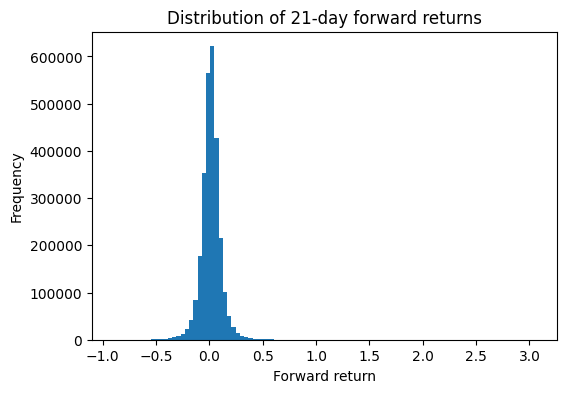

In [16]:
X, y, dates, tickers = build_cross_sectional_matrix(signals_df)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Feature names:", CROSS_FEATURES)
print("Min/max date:", dates.min(), "->", dates.max())
print("Num unique tickers:", np.unique(tickers).size)

# Quick sanity checks on target distribution
plt.figure(figsize=(6, 4))
plt.hist(y, bins=100)
plt.title(f"Distribution of {lookahead}-day forward returns")
plt.xlabel("Forward return")
plt.ylabel("Frequency")
plt.show()
